### Table of Contents

### Data analysis (preprocessing, heap's law, zief's law, bigram)

### Word Clouds

### LDA
*  LDA over all years and logistic regression - unigram
*  LDA over 3 time period windows (~2000, ~2010, ~2020)
*  Dynamic Topic modelling

* Logistic Regression

Note
Y variable is 1 = cited above median (4), 0 = anything less than 4

In [1]:
import pickle, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
import numpy as np
import spacy

# Get the data and check it

In [2]:
# unpickled_df = pd.read_pickle("C:/Users/amt/Documents/0. MSc Tinbergen/block 5. NLP/extracted_data.pkl")
unpickled_df = pd.read_pickle(r"C:\Users\marco\Desktop\NLP\extracted_data.pkl")

* Take out the nan values

In [3]:
df = unpickled_df[unpickled_df['description'].notna()]
df

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,article_number,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor,h_index
17,2-s2.0-85103948648,10.1016/j.compag.2021.106132,S0168169921001502,None,"Design, development, and performance evaluatio...",ar,Article,Massah J.,60023636;60022927,Gorgan University of Agricultural Sciences and...,...,106132,None,One of the applications of robotic farmer-assi...,Evolutionary algorithms | Machine vision | Sup...,0,0,None,undefined,None,10
18,2-s2.0-85102449056,10.1007/s40171-021-00262-0,None,None,Technology and Entrepreneurial Marketing Decis...,ar,Article,Polas M.R.H.,109606759,Limkokwing University of Creative Technology,...,None,95-112,The prime concern of this study is to explore ...,Bangladesh | COVID-19 | Entrepreneurial market...,2,1,None,undefined,None,1
19,2-s2.0-85099393297,10.1016/j.tourman.2021.104288,S0261517721000078,None,Value proposition operationalization in peer-t...,ar,Article,Ramos-Henríquez J.M.,60003044,Universidad de la Laguna,...,104288,None,The purpose of this paper is to operationalize...,Classification | Features selection | Machine ...,0,0,None,undefined,Fundación CajaCanarias,3
20,2-s2.0-85105288221,10.1016/j.comcom.2021.04.012,S0140366421001481,None,Social media privacy management strategies: A ...,ar,Article,Chung K.C.,60078643;60014390,National Penghu University;Providence Universi...,...,None,122-130,Artificial intelligence (AI) is widely used in...,Artificial intelligence | Information security...,0,0,None,undefined,None,4
21,2-s2.0-85078802894,10.1016/j.jbusres.2020.01.029,S0148296320300369,None,Brain buzz for Facebook? Neural indicators of ...,ar,Article,Zhang J.,60007511,Sungkyunkwan University,...,None,444-452,Marketing in social media is gaining importanc...,Content engagement | Event-related potentials ...,1,0,NRF,2015H1A2A1031721,National Research Foundation of Korea,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5129,2-s2.0-0022028267,None,None,None,AI MARKET PROSPECTS ARE GOOD.,ar,Article,Friscia A.,100407440,Int Data Corp,...,None,41-42,Artificial intelligence (AI) has been referred...,None,0,0,None,undefined,None,0
5131,2-s2.0-0022192653,10.1016/0747-5632(85)90022-6,0747-5632(85)90022-6,None,Psychological decision support software for th...,ar,Article,Eyde L.D.,100590404,U.S. Office of Personnel Management,...,None,321-336,"Decision Support Systems, when based on psycho...",None,4,0,None,undefined,None,8
5134,2-s2.0-0000133127,10.1016/0361-3682(84)90020-5,0361-3682(84)90020-5,None,The role of attention and memory in accounting...,ar,Article,Birnberg J.,60015543;60010065,University of Pittsburgh;The University of Ari...,...,None,365-382,Behavioral research in accounting has ignored ...,None,45,0,None,undefined,None,15
5136,2-s2.0-84976796492,10.1145/953032.804603,None,None,Personal computing: An Adventure of the mind,ar,Article,Rine D.,60010100,Western Illinois University,...,None,8,“A National Educational TV Series at Pre-Colle...,None,0,0,None,undefined,None,12


# Corpus warm-up:

* First, make all words in abstract lower cases
* Create the corpus of abstracts

In [4]:
def column_to_lower(df, column):
    """
        Input: df and a corresponding column
        Output: converted dataframe column 
        Function: Converts all strings in a column of a dataframe to lowercases.
    """
    return df[column].str.lower()

df.loc[:,'description'] = column_to_lower(df, 'description')

corpus = df["description"].tolist()

C:\Users\marco\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [5]:
#check how some values look like
corpus[0]
#type(corpus[0])
#len(corpus)
#1028 abstracts

'one of the applications of robotic farmer-assistant platforms equipped with machine vision systems is the evaluation of production yield before harvest without damaging the product. in this situation, farmers receive proper information for harvesting and post-harvesting management to decide about the required human resources, harvesting equipment, storage space, transportation, and product marketing. in this study, a machine vision system on a tracked vehicle was designed and developed for yield estimation of kiwifruit by traveling along the kiwifruit trellis. several features, i.e., intensity histogram, the histogram of oriented gradients, shape context, and local binary pattern, were extracted from the images captured from the plants, and the number of kiwifruits in the images was predicted using the support vector machine (svm). to improve the performance of the svm, its parameters were optimized using evolutionary optimization methods, namely, particle swarm optimization (pso), an

In [6]:
#to count the amount of words in the entire dataset, also repeating
corpus_all = []

for i in range(0,len(corpus)):
    res = re.findall(r'\w+', str(corpus[i]))
    corpus_all.extend(res)
    
#corpus_all
#len(corpus_all)
#type(corpus_all)
#print(corpus_all)

* Create a list all the unique words in the corpus

In [7]:
lister = []
for i in corpus_all:
    if i not in lister:
        lister.append(i)
            
#print(lister)
print("There are", len(lister), "unique words in that list")

There are 14055 unique words in that list


* Tokenize and check the words most frequent in the entire corpus

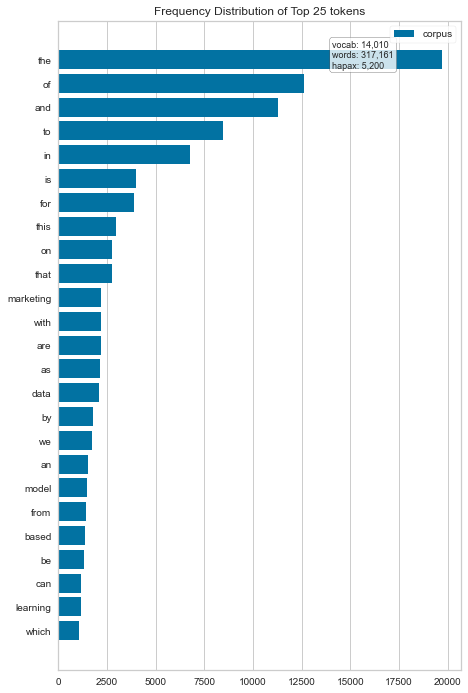

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [8]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25, size= (520, 860))
visualizer.fit(docs)
visualizer.show()

A function that takes as inputs a visualizer object and the number of words to be plotted and returns the **Zipf's law plot**

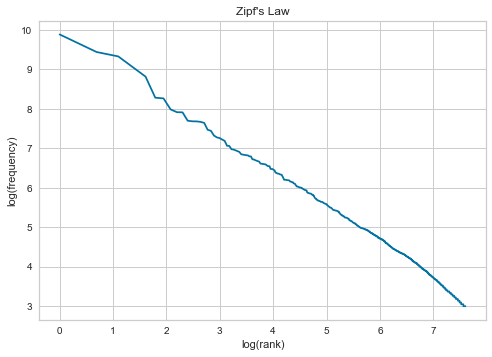

In [9]:
def zipf_law_plot(visualizer_obj, n):
    # Create a Dataframe with 2 columns: the word and the number of times it has been used
    word_count = pd.DataFrame({"word":visualizer_obj.features,
                               "count":visualizer_obj.freqdist_})
    # Ordering words based on the number of times they have been used and resetting index
    word_count = word_count.sort_values(by = "count", ascending = False)
    word_count.reset_index(inplace = True, drop = True)
    # Plotting
    plt.plot(np.log(np.arange(1,n+1)), np.log(word_count.iloc[:n,1]))
    plt.title("Zipf's Law")
    plt.xlabel("log(rank)")
    plt.ylabel("log(frequency)")

n_words_zipf = 2000 # The number of words with highest count we include in the plot
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

### Take out english stopwords and check which are the most used words

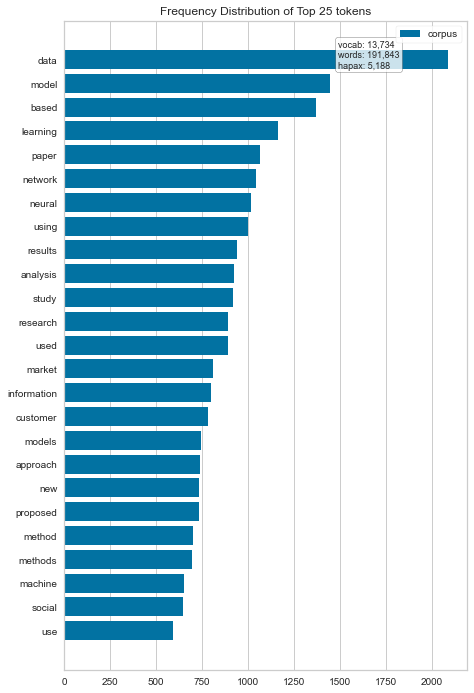

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [10]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["marketing"])

vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

**Zipf's law plot** excluding English stop words

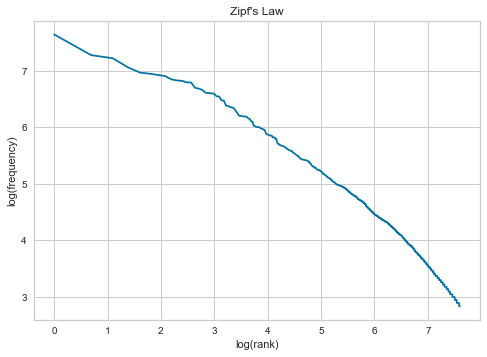

In [11]:
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

In [12]:
#list of english stopwords 
#from sklearn.feature_extraction import stop_words
#print(stop_words.ENGLISH_STOP_WORDS)

In [13]:
'detail' in corpus_all

True

* Check the most popular words only for some years

In [14]:
from datetime import datetime, timedelta
df['coverDate'] = df['coverDate'].astype('datetime64')

<ipython-input-14-d93d4b1fa0d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coverDate'] = df['coverDate'].astype('datetime64')


In [15]:
df = df.set_index('coverDate')

In [16]:
df["coverDate"] = df.index #terrible to add this columns equal to the index, but the LDA part uses it several times

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

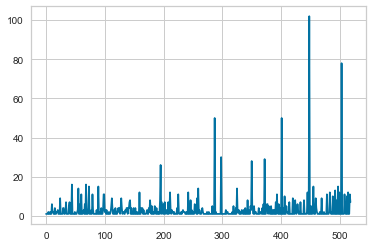

In [18]:
#number of articles published per date (dates with 0 articles are not ont he chart)
plt.plot(df.description.groupby(df.index.date).count().tolist())
plt.show()

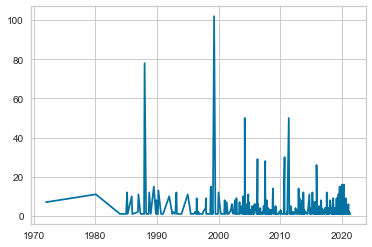

In [19]:
plt.plot(df.index.unique(),df.description.groupby(df.index.date).count().tolist())
plt.show()

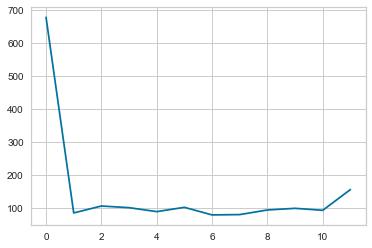

In [20]:
#number of articles published per month (months with 0 articles are not ont he chart)
#the aggregation is done per month. we can see that a lot is published in january, 
#a bit in December, but less at the end of summer
plt.plot(df.description.groupby(df.index.month).count().tolist())
plt.show()

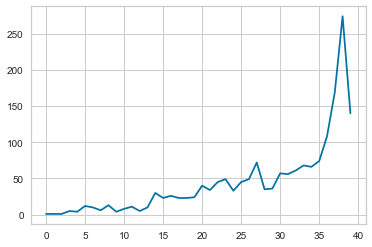

In [21]:
#number of articles published per year, for the years that 
plt.plot( df.description.groupby(df.index.year).count().tolist())
plt.show()

In [22]:
df.description.groupby(df.index.year).count()

coverDate
1972      1
1980      1
1984      1
1985      5
1986      4
1987     12
1988     10
1989      6
1990     13
1991      4
1992      8
1993     11
1994      5
1995     10
1996     30
1997     23
1998     26
1999     23
2000     23
2001     24
2002     40
2003     34
2004     45
2005     49
2006     33
2007     45
2008     49
2009     72
2010     35
2011     36
2012     57
2013     56
2014     61
2015     68
2016     66
2017     74
2018    108
2019    169
2020    274
2021    140
Name: description, dtype: int64

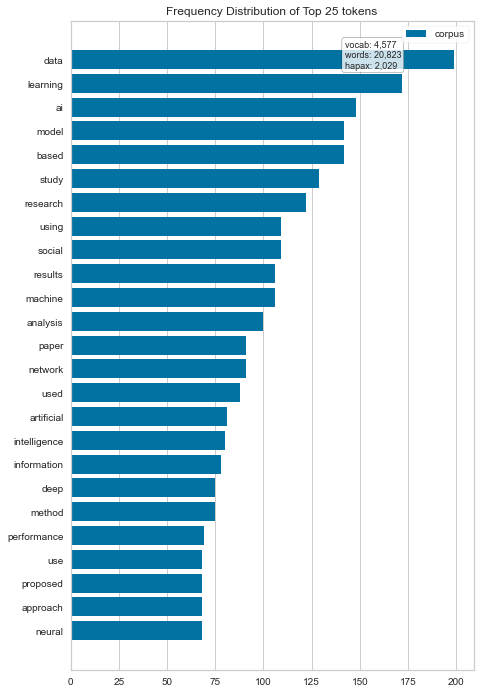

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [23]:
'year 2021'
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[0:171])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

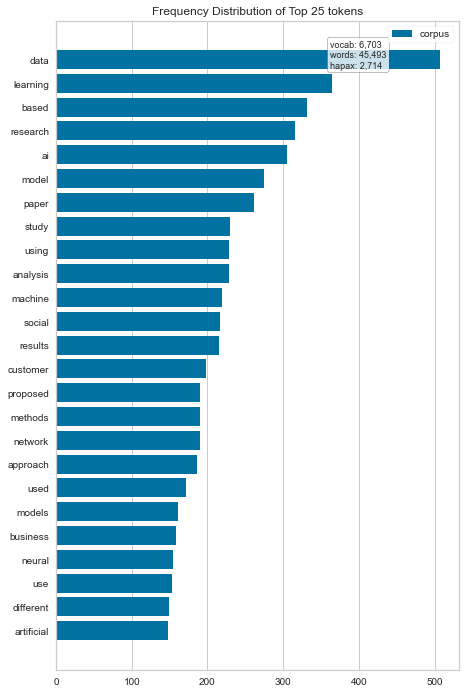

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [24]:
#year 2020
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[171:546])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

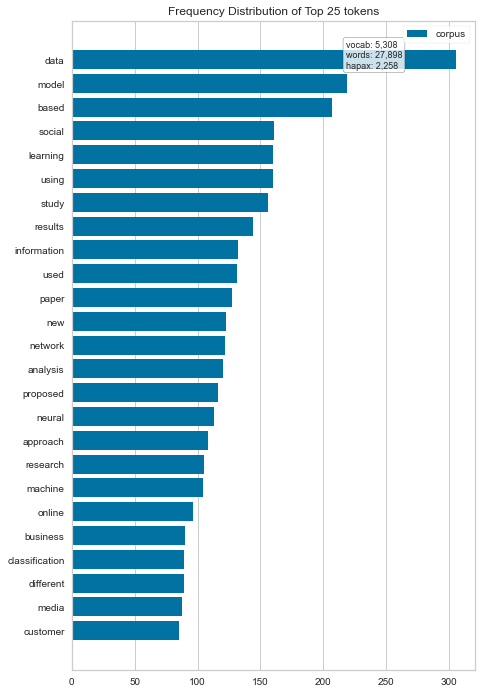

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [25]:
#year 2019
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[546:775])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

-----

**Heap's law plot**

*** The plot shows that our corpus follows the heap's law


Text(0, 0.5, 'n of unique words')

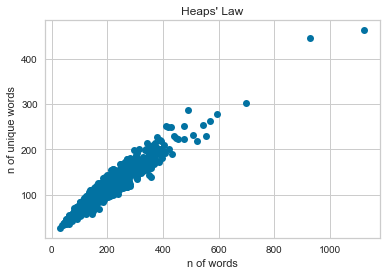

In [26]:
n_words = []
n_unique_words = []

for i in range(0,len(corpus)):
    res = [word.lower() for word in re.findall(r'\w+', corpus[i])]
    n_unique_words.append(len(set(res)))
    n_words.append(len(res))
    
plt.plot(n_words, n_unique_words, "o")
plt.title("Heaps' Law")
plt.xlabel("n of words")
plt.ylabel("n of unique words")

----

### Pre-processing:  Lemmatizing & Tokenization

In [27]:
import spacy
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('averaged_perceptron_tagger')
spacyen = spacy.load('en_core_web_sm')

In [28]:
lemmatizer = WordNetLemmatizer()

In [29]:
lemmatizer.lemmatize(re.findall(r'\w+', corpus[0])[22])

'without'

In [30]:
(nltk.pos_tag([lemmatizer.lemmatize(re.findall(r'\w+', corpus[0])[22])])[0][1]).lower()

'in'

the cell below works if I do not indicate pos. If I indicate pos it does not work and I do not know what are the right names for the pos to be indicated. te pos I added is the pos nltk outputs

### lemmatize() below does not work correctly

We should add the POS for each word we are using, something like:

```python
lemmatizer.lemmatize(token, pos = 'v')
```
Otherwise it consider all words as if they were nouns and does not correctly tokenize verbs for example

```python
corpus_all_lower_lemma = []

for each1abs in corpus: 
    abstract = re.findall(r'\w+', each1abs)
    for each1word in abstract:
        sentence = []
        lemm_word = lemmatizer.lemmatize(each1word, pos = (nltk.pos_tag([each1word])[0][1]).lower())
        sentence.append(lemm_word)
    corpus_all_lower_lemma.append(sentence)
```

In [31]:
from nltk.tokenize import RegexpTokenizer
import gensim
from gensim.utils import simple_preprocess
from wordcloud import STOPWORDS

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
            if word not in STOPWORDS] for doc in texts]

corpus_tkn = corpus.copy()

tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(corpus)):
    corpus_tkn[idx] = tokenizer.tokenize(str(corpus[idx]))

corpus2 = [[token for token in doc if not token.isnumeric()] for doc in corpus_tkn]
corpus2 = [[token for token in doc if len(token) > 1] for doc in corpus_tkn]

C:\Users\marco\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [32]:
import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
corpus2 = [[lemmatizer.lemmatize(token) for token in doc] for doc in corpus2]

#corpus_all_lower_lemma
print(len(corpus2))

1751


In [33]:
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(corpus2, min_count=20)

for idx in range(len(corpus2)):
    # print(idx)
    for token in bigram[corpus2[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            corpus2[idx].append(token)

In [34]:
print(corpus2[1]) # Checking if it correctly added the bigrams

['the', 'prime', 'concern', 'of', 'this', 'study', 'is', 'to', 'explore', 'how', 'technology', 'influence', 'entrepreneurial', 'marketing', 'decision', 'during', 'the', 'world', 'pandemic', 'covid', '19', 'the', 'study', 'us', 'sample', 'of', '127', 'smes', 'from', 'bangladesh', 'data', 'were', 'collected', 'by', 'sending', 'out', 'questionnaire', 'electronically', 'and', 'by', 'mail', 'smart', 'pls', 'sem', 'wa', 'used', 'to', 'analyse', 'the', 'data', 'following', 'the', 'quantitative', 'method', 'the', 'study', 'reveals', 'positive', 'and', 'significant', 'relationship', 'between', 'entrepreneurial', 'opportunity', 'recognition', 'opportunity', 'development', 'and', 'opportunity', 'exploitation', 'with', 'their', 'entrepreneurial', 'marketing', 'decision', 'it', 'also', 'claim', 'that', 'entrepreneurial', 'passion', 'mediates', 'the', 'relationship', 'between', 'entrepreneurial', 'opportunity', 'recognition', 'and', 'opportunity', 'development', 'with', 'their', 'entrepreneurial', '

### Stemming

In [35]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

## Count corpus sentences
Note: if we need the sentences as well, we should extract them 

In [36]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0])

['one of the applications of robotic farmer-assistant platforms equipped with machine vision systems is the evaluation of production yield before harvest without damaging the produ',
 'in this situation, farmers receive proper information for harvesting and post-harvesting management to decide about the required human resources, harvesting equipment, storage space, transportation, and product marketi',
 'in this study, a machine vision system on a tracked vehicle was designed and developed for yield estimation of kiwifruit by traveling along the kiwifruit trell',
 'several features, i.e., intensity histogram, the histogram of oriented gradients, shape context, and local binary pattern, were extracted from the images captured from the plants, and the number of kiwifruits in the images was predicted using the support vector machine (svm). to improve the performance of the svm, its parameters were optimized using evolutionary optimization methods, namely, particle swarm optimization (pso)

In [37]:
len(re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0]))

8

In [38]:
corpus_sentences = []

for i in range(0,len(corpus)):
    #split the current abstract into sentences
    sentences = re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[i])
    #nr of sentences in current abstract
    nr_of_sentences = len(sentences)
    corpus_sentences.append(nr_of_sentences)

In [39]:
df.loc[:,'nr_sentences_abstract'] = corpus_sentences

In [40]:
df.nr_sentences_abstract.describe()

count    1751.000000
mean        7.834951
std         3.291487
min         1.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        40.000000
Name: nr_sentences_abstract, dtype: float64

In [41]:
#print(df.nr_sentences_abstract.sum(), "total number of sentences")
#print(df.nr_sentences_abstract.median(), "median")
#print(df.nr_sentences_abstract.describe())
#print(df.loc[df['nr_sentences_abstract'] == 46]['description'].values)

In [42]:
df.loc[df['nr_sentences_abstract'] == 40]['description'].values # Before it was 46, then 41, now it seems to be 40... what did we remove?

array(['chapter 1: how australia improved health equity through action on the social determinants of health: do not think that the social determinants of health equity are old hat. in reality, australia is very far away from addressing the societal level drivers of health inequity. there is little progressive policy that touches on the conditions of daily life that matter for health, and action to redress inequities in power, money and resources is almost non-existent. in this chapter we ask you to pause this reality and come on a fantastic journey where we envisage how covid-19 was a great disruptor and accelerator of positive progressive action. we offer glimmers of what life could be like if there was committed and real policy action on the social determinants of health equity. it is vital that the health sector assists in convening the multisectoral stakeholders necessary to turn this fantasy into reality. chapter 2: aboriginal and torres strait islander connection to culture: buil

In [43]:
#df.loc[df['nr_sentences_abstract'] == 41]['description']
#re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', df.loc[1922]["description"])

### Keywords

In [44]:
keywords = df["authkeywords"].tolist()
print(keywords[1])

Bangladesh | COVID-19 | Entrepreneurial marketing decisions | Opportunity development | Opportunity exploitation | Opportunity recognition | Technology


In [45]:
keywords_paper = [] # List of the keywords associated to each paper (another list)
keywords_all = [] # List of all the keywords (the same keyword can be repeated more than once)

for i in range(0, len(keywords)):
    # Some articles do not have keywords, set it to nan
    if keywords[i] == None:
        res = pd.NA
    else:
        # The keywords are separated by " | ", using it to split them
        res = keywords[i].split(" | ")
        keywords_all.extend(res) # Must be inside the else block, otherwise get error: 'NAType' object is not iterable
    keywords_paper.append(res)

# Checking if okay
print(keywords_all[5000])
print(keywords_paper[50])

text classification
['classification', 'clustering', 'deep learning', 'lexical features', 'online advertisement']


# (Very) Basic sentiment analysis

In [46]:
from textblob import TextBlob

subjectivity_list = []
for abstr in df.description:
    # TextBlob().sentiment returns the sentiment associated with a sentence (or sentences in this case)
    subjectivity_list.append(TextBlob(abstr).sentiment[1]) # [1] because we take only the subjetivity measure
    # with .sentiment[0] we would get an index in the range [-1,+1] that reports the positity/negativity of the sentence

# merge it with the dataframe
df["abs_subjectivity"] = subjectivity_list
print(max(df["abs_subjectivity"]))
print(min(df["abs_subjectivity"]))

# check if correlated with number of citations
print(np.corrcoef(df["abs_subjectivity"], df.citedby_count))

# check one of the most subjective sentences (does not sound that subjective)
print(df[df["abs_subjectivity"] == 0.9].description.values)

1.0
0.0
[[ 1.         -0.00492618]
 [-0.00492618  1.        ]]
["expert and millwide systems in the latest news on process control from tappi's annual meeting in atlanta, g.a., this article describes the benefits computer technology applications will offer to paper machine performance and paper sales team."]


In [47]:
import pysentiment2 as ps

In [48]:
lm = ps.LM()
list_scores = []
for i in range(0,len(corpus)):
    tokens = lm.tokenize(corpus[i])
    score = lm.get_score(tokens)
    list_scores.append(score)

In [49]:
len(list_scores)

1751

In [50]:
df_sentiment = pd.DataFrame.from_dict(list_scores) 

In [51]:
df_sentiment.head()

,Positive,Negative,Polarity,Subjectivity
0,4,2,0.333333,0.042553
1,8,6,0.142857,0.157303
2,0,1,-0.999999,0.012821
3,8,10,-0.111111,0.136364
4,2,7,-0.555555,0.104651


----

## Word cloud


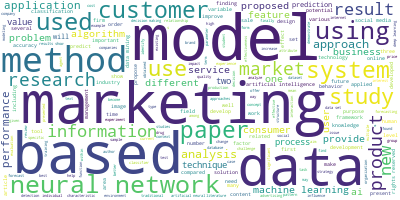

In [52]:
from wordcloud import WordCloud


long_string = ','.join(list(df['description'].values))
#print(long_string[1:100])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

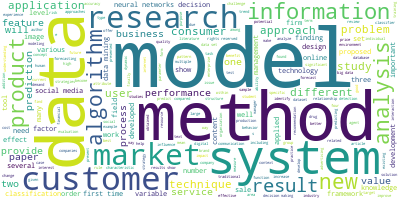

In [53]:
#This is the wordcloud without the keywords

REMOVE_LIST = ["artificial intelligence", "artifical", "intelligence", "machine", "learning", "machine learning",
              "marketing", "deep learning", "deep", "learning", "neural network", "nueral", "network", "AI", "based", "using",
              "used", "use"]

REMOVE_LIST = STOPWORDS.union(REMOVE_LIST)

remove = '|'.join(REMOVE_LIST)
    
regex = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE)

out1= [regex.sub("", str(x)) for x in df['description']]

#print(out1[1])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

out = ','.join(list(out1))

wordcloud.generate(out)

wordcloud.to_image()

# LDA - unigram

In [54]:
out1 = df['description'].values #unigram

def sent_to_words(sentences):
    for sentence in sentences:
        #deacc = True -> removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

data_words = list(sent_to_words(out1))

data_words = remove_stopwords(data_words)

#print(data_words[:1][0][:30])

for i in range(len(data_words)):
    for j in range(len(data_words[i])):
        each1 = lemmatizer.lemmatize(data_words[i][j])
        data_words[i][j] = each1

In [55]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]


#print(corpus[:1][0][:30])

In [56]:
from pprint import pprint

num_topics = 15

lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50, decay = 0.6)

lda_model.save('lda_model.model')

doc_lda = lda_model[corpus]


In [57]:
print(lda_model.print_topics(20, num_words = 20))

[(0, '0.020*"crm" + 0.015*"personality" + 0.011*"data" + 0.009*"analysis" + 0.008*"study" + 0.007*"assistant" + 0.007*"customer" + 0.006*"human" + 0.006*"game" + 0.006*"relationship" + 0.005*"artificial" + 0.005*"test" + 0.005*"marketing" + 0.005*"cluster" + 0.005*"coalition" + 0.005*"show" + 0.004*"code" + 0.004*"set" + 0.004*"used" + 0.004*"negotiation"'), (1, '0.029*"model" + 0.022*"market" + 0.021*"network" + 0.017*"neural" + 0.011*"price" + 0.009*"system" + 0.009*"forecasting" + 0.008*"method" + 0.008*"result" + 0.007*"paper" + 0.007*"problem" + 0.007*"based" + 0.007*"prediction" + 0.006*"time" + 0.006*"data" + 0.006*"used" + 0.006*"proposed" + 0.006*"approach" + 0.006*"using" + 0.006*"performance"'), (2, '0.020*"drug" + 0.010*"food" + 0.008*"report" + 0.007*"effect" + 0.007*"event" + 0.006*"yield" + 0.006*"music" + 0.005*"adverse" + 0.005*"signal" + 0.005*"organic" + 0.005*"information" + 0.005*"gmdh" + 0.005*"result" + 0.005*"adr" + 0.005*"using" + 0.005*"visual" + 0.004*"signif

In [58]:
#print(lda_model.print_topics(20, num_words = 15)[:10])

train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)
    
print(len(train_vecs))

1751


In [59]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+str(num_topics) + '.html')

## This cell tries interaction term - I am still figuring it out.

In [60]:
df.citedby_count.describe()

df['y']=df.citedby_count>4
#print(df['y'])

df['year'] = df['coverDate'].astype(str).str[0:4]

df['year'] = df['year'].astype(int)

df.loc[df['year'] <2000,'coverDate'] = 0

df.loc[df['year'] > 2010,'coverDate'] = 2

df.loc[(df['year']>=2000) & (df['year'] <= 2010) ,'coverDate'] = 1
#a = np.array(df.coverDate.values.tolist())
#df['coverDate'] = np.where(a < '2000-1-1', 0, a).tolist()
#year

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Logistic Regression - Still need to add the sentiments

### X: Topic distribution per corpus, year, Sentiment, author publication score, first author's university rank, 

### y: citation number

### Things to do
* k-cv to choose the optimal topic numbers
* bigram
* interaction term

### Results

We see that a normal logistic model performs the best in terms of f1 score

* We can try other diagnostics.

y should be weighted because earlier publications usually dont have 
fair chance to be cited. Thus, we weight the y variable. 
Or, we should delete the publications published after 2020-6-1

For now, no logical methods is proposed. Thus, we restrict our sample size.

In [61]:
#logistic regression - unigram
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
import numpy as np

X = np.column_stack([train_vecs, df.coverDate, df.h_index])
y = np.array(df.y)


kf = KFold(10, shuffle = True, random_state = 42)

cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int

C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:93: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https

Logistic Regression Val f1: 0.689 +- 0.049
Logisitic Regression SGD Val f1: 0.667 +- 0.041
SVM Huber Val f1: 0.419 +- 0.342


C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

#We create a handful of LDA models with different topic values, 
#then see how these perform in the supervised classification model training
#This is specific to our goal

 We can also run HDP, which seeks to learn the correct number of topics
 from the data, that is, you don't need to provide a fixed number of topics.
 In the end, we expect to run a basic logistic regression - to be done later

When topic = 20

Logistic Regression Val f1: 0.564 +- 0.045
Logisitic Regression SGD Val f1: 0.504 +- 0.067
SVM Huber Val f1: 0.462 +- 0.304
    
When topic = 15
Logistic Regression Val f1: 0.545 +- 0.047
Logisitic Regression SGD Val f1: 0.563 +- 0.049
SVM Huber Val f1: 0.402 +- 0.329
    
When topic = 10

Logistic Regression Val f1: 0.563 +- 0.047
Logisitic Regression SGD Val f1: 0.561 +- 0.090
SVM Huber Val f1: 0.401 +- 0.328
    
When topic = 5

Logistic Regression Val f1: 0.530 +- 0.037
Logisitic Regression SGD Val f1: 0.532 +- 0.066
SVM Huber Val f1: 0.393 +- 0.321

## LDA - bigram + trigram + logistic regression


In [62]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
corpus2 = remove_stopwords(corpus2)
dictionary2 = Dictionary(corpus2)
dictionary2.filter_extremes(no_below=20, no_above=0.5)
bi_corpus = [dictionary2.doc2bow(doc) for doc in corpus2]

num_topics = 20

temp = dictionary2[0]  # This is only to "load" the dictionary.

lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = num_topics, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.6)


C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/lda_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/lda_'+str(num_topics) + '.html')

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(bi_corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)
    
print(len(train_vecs))

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1751


In [65]:
print(train_vecs)

[[0.0004238123, 0.0004238123, 0.0004238123, 0.0004238123, 0.0004238123, 0.0004238123, 0.0004238123, 0.0004238123, 0.0004238123, 0.16646944, 0.0004238123, 0.06220976, 0.0004238123, 0.5197509, 0.0004238123, 0.032840926, 0.0004238123, 0.2123718, 0.0004238123, 0.0004238123], [0.0007463943, 0.07255846, 0.0007463943, 0.0007463943, 0.0007463943, 0.0007463943, 0.048814047, 0.0007463943, 0.0007463943, 0.0007463943, 0.61747086, 0.19796604, 0.0007463943, 0.051994663, 0.0007463943, 0.0007463943, 0.0007463943, 0.0007463943, 0.0007463943, 0.0007463943], [0.0007463719, 0.0007463719, 0.0007463719, 0.0007463719, 0.0007463719, 0.0007463719, 0.03088991, 0.0007463719, 0.42571142, 0.27702335, 0.17687923, 0.0007463719, 0.0007463719, 0.0007463719, 0.0007463719, 0.0007463719, 0.0007463719, 0.078300476, 0.0007463719, 0.0007463719], [0.0004132889, 0.0004132889, 0.11108371, 0.0004132889, 0.0004132889, 0.12060793, 0.0004132889, 0.0004132889, 0.3389043, 0.0004132889, 0.42279142, 0.0004132889, 0.0004132889, 0.00041

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
#logistic regression - unigram
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import numpy as np

X = np.column_stack([train_vecs, df.coverDate, df.h_index])
y = np.array(df.y)


kf = KFold(10, shuffle = True, random_state = 42)

lr_score , lrsgd_score, svcsgd_score, cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    lr_score.append(lr.score(X_val, y_val))
    
    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    lrsgd_score.append(sgd.score(X_val, y_val))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    svcsgd_score.append(sgd_huber.score(X_val, y_val))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int

C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

Logistic Regression Val f1: 0.681 +- 0.042
Logisitic Regression SGD Val f1: 0.647 +- 0.056
SVM Huber Val f1: 0.485 +- 0.318


C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

In [67]:
print(f'Logistic Regression Accuracy:{np.mean(lr_score)}')
print(f'Logistic Regression SGD Accuracy:{np.mean(lrsgd_score)}')
print(f'SVM Huber Accuracy:{np.mean(svcsgd_score)}')

Logistic Regression Accuracy:0.5933701298701298
Logistic Regression SGD Accuracy:0.6042305194805195
SVM Huber Accuracy:0.5619480519480519


C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
lda_model.show_topic

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method LdaModel.show_topic of <gensim.models.ldamulticore.LdaMulticore object at 0x00000266F75B41C0>>

## LDA over time

### Firstly, we divide the data in 3 windows (~2000, ~2010 ~2020)

In [69]:
from pprint import pprint

num_topics = 5

inc = df.coverDate == 0
inc.astype(int)

corpus0 = [x for x, y in zip(corpus2, inc) if y == 1]
id2word = Dictionary(corpus0)
corpus0 = [dictionary2.doc2bow(doc) for doc in corpus0]



lda_model0 = gensim.models.LdaMulticore(corpus = corpus0, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every= 10, chunksize = 10, 
                                      passes = 2,decay = 0.6)


lda_model0.save('lda_model0.model')

print(lda_model0.print_topics(10, num_words = 15)[:10])

doc_lda0 = lda_model0[corpus0]


C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.026*"educational" + 0.021*"scale" + 0.020*"three" + 0.017*"fully" + 0.007*"make" + 0.006*"business" + 0.006*"accommodate" + 0.006*"potential" + 0.005*"maker" + 0.005*"provides" + 0.005*"inc" + 0.004*"use" + 0.004*"advanced" + 0.004*"corporation" + 0.004*"find"'), (1, '0.024*"accommodate" + 0.010*"fully" + 0.008*"available" + 0.007*"provide" + 0.006*"educational" + 0.005*"test" + 0.005*"break" + 0.005*"scale" + 0.005*"advanced" + 0.005*"decision_maker" + 0.005*"not_only" + 0.005*"address" + 0.005*"inc" + 0.005*"wireplay" + 0.004*"discovering"'), (2, '0.020*"inc" + 0.012*"educational" + 0.011*"practice" + 0.011*"potential" + 0.010*"fully" + 0.009*"scale" + 0.009*"advanced" + 0.008*"configured" + 0.007*"auction" + 0.007*"novel" + 0.007*"ha" + 0.007*"arrival" + 0.007*"three" + 0.007*"rule" + 0.006*"maker"'), (3, '0.020*"inc" + 0.015*"accommodate" + 0.010*"break" + 0.008*"fully" + 0.008*"credibly" + 0.007*"arrival" + 0.007*"billing" + 0.007*"maker" + 0.006*"address" + 0.006*"decisio

In [70]:
#~2000


train_vecs0 = []
for i in range(len(corpus0)):
    top_topics0 = (
        lda_model0.get_document_topics(corpus0[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec0 = [top_topics0[i][1] for i in range(num_topics)]
    train_vecs0.append(topic_vec0)

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis0_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model0, corpus0, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis0_prepared_'+str(num_topics) + '.html')

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
#~2010

from pprint import pprint

num_topics = 10

inc = df.coverDate == 1
inc.astype(int)

corpus1 = [x for x, y in zip(corpus2, inc) if y == 1]
id2word = Dictionary(corpus1)
corpus1 = [dictionary2.doc2bow(doc) for doc in corpus1]



lda_model1 = gensim.models.LdaMulticore(corpus = corpus1, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every= 10, chunksize = 10, 
                                      passes = 2,decay = 0.6)


lda_model1.save('lda_model1.model')

print(lda_model1.print_topics(10, num_words = 15)[:10])

doc_lda1 = lda_model1[corpus1]


C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.014*"deeper" + 0.014*"dominant" + 0.011*"play" + 0.011*"incorporates" + 0.011*"london" + 0.010*"department" + 0.009*"believe" + 0.008*"competence" + 0.008*"recently" + 0.008*"essential" + 0.008*"intelligent" + 0.007*"experience" + 0.007*"functionality" + 0.007*"tried" + 0.007*"suggests"'), (1, '0.019*"incorporated" + 0.018*"alternative" + 0.014*"competence" + 0.011*"summarized" + 0.011*"today" + 0.010*"rbfn" + 0.008*"classification" + 0.008*"operate" + 0.008*"concept" + 0.008*"static" + 0.007*"related" + 0.007*"functionality" + 0.006*"appropriate" + 0.006*"understanding" + 0.006*"deeper"'), (2, '0.022*"deeper" + 0.014*"london" + 0.009*"specifically" + 0.009*"dominant" + 0.009*"play" + 0.008*"rbfn" + 0.007*"recently" + 0.007*"incorporates" + 0.007*"outbound" + 0.007*"new" + 0.007*"bayesian" + 0.006*"incorporated" + 0.006*"attribute" + 0.006*"based" + 0.006*"tried"'), (3, '0.025*"deeper" + 0.020*"play" + 0.017*"incorporates" + 0.014*"department" + 0.012*"incorporated" + 0.011*"co

In [72]:
train_vecs1 = []

for i in range(len(corpus1)):
    top_topics1 = (
        lda_model1.get_document_topics(corpus1[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec1 = [top_topics1[i][1] for i in range(num_topics)]
    train_vecs1.append(topic_vec1)

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis1_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model1, corpus1, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis1_prepared_'+str(num_topics) + '.html')

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
LDAvis_prepared

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.046746 -0.010026       1        1  25.717160
6      0.040212 -0.040991       2        1  18.241970
8      0.056015 -0.005027       3        1  15.955559
2      0.064292  0.020955       4        1  12.766739
7      0.006649 -0.043309       5        1   8.459725
5      0.008118  0.020963       6        1   7.051378
0      0.002111  0.038691       7        1   4.806647
1     -0.086947 -0.079931       8        1   3.175068
9     -0.028974  0.060778       9        1   3.074657
4     -0.108221  0.037897      10        1   0.751097, topic_info=              Term        Freq       Total Category  logprob  loglift
302         deeper  658.000000  658.000000  Default  30.0000  30.0000
39    incorporated  334.000000  334.000000  Default  29.0000  29.0000
795         london  389.000000  389.000000  Default  28.0000  28.0000
91      competence  491.000000  491.000000  Default  27.0000  27.0000
306       dominant  221.000000  221.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
248   incorporates    1.189299  361.158569  Topic10  -5.5227  -0.8246
32   functionality    0.950707  167.881067  Topic10  -5.7466  -0.2824
75           today    1.003582  333.573392  Topic10  -5.6925  -0.9149
167        content    0.829244   95.035169  Topic10  -5.8833   0.1499
43            main    0.779413  143.152177  Topic10  -5.9452  -0.3217

[708 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
568      10  0.810814      a_well
1270      1  0.966880     able_to
0         1  0.347038     account
0         2  0.275011     account
0         3  0.104766     account
...     ...       ...         ...
1496      7  0.049227       whole
1215      8  0.488416  wide_range
717       2  0.214326        word
717       4  0.642979        word
81        4  0.608393        work

[2190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 9, 3, 8, 6, 1, 2, 10, 5])

In [74]:
#~2020

#~2010

from pprint import pprint

num_topics = 10

inc = df.coverDate == 2
inc.astype(int)

corpus3 = [x for x, y in zip(corpus2, inc) if y == 1]
id2word = Dictionary(corpus3)
corpus3 = [dictionary2.doc2bow(doc) for doc in corpus3]



lda_model2 = gensim.models.LdaMulticore(corpus = corpus3, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every= 10, chunksize = 10, 
                                      passes = 2,decay = 0.6)


lda_model2.save('lda_model2.model')

print(lda_model2.print_topics(10, num_words = 15)[:10])

doc_lda2 = lda_model2[corpus1]


train_vecs2 = []
for i in range(len(corpus3)):
    top_topics2 = (
        lda_model2.get_document_topics(corpus3[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec2 = [top_topics2[i][1] for i in range(num_topics)]
    train_vecs2.append(topic_vec2)

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis2_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model2, corpus3, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis2_prepared_'+str(num_topics) + '.html')

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.016*"optimization" + 0.012*"sem" + 0.012*"social_network" + 0.010*"input" + 0.008*"accessible" + 0.008*"predicting" + 0.008*"management" + 0.007*"plant" + 0.007*"vision" + 0.007*"vehicle" + 0.006*"without" + 0.006*"traveling" + 0.006*"required" + 0.006*"involving" + 0.006*"this_work"'), (1, '0.022*"required" + 0.017*"feature" + 0.017*"significant" + 0.011*"management" + 0.011*"exerted" + 0.010*"social_network" + 0.008*"dynamic" + 0.008*"without" + 0.008*"kiwifruit" + 0.008*"aco" + 0.007*"collected" + 0.007*"extracted_from" + 0.007*"post" + 0.007*"optimization" + 0.007*"test"'), (2, '0.022*"guiding" + 0.012*"sharing" + 0.007*"occur" + 0.006*"food" + 0.005*"equipment" + 0.005*"quality" + 0.005*"host" + 0.004*"econometrics" + 0.004*"vision" + 0.004*"problem" + 0.004*"room" + 0.004*"commerce" + 0.004*"concept" + 0.004*"provides" + 0.004*"lpp"'), (3, '0.013*"social_network" + 0.013*"firm" + 0.010*"dynamic" + 0.010*"required" + 0.010*"pls" + 0.009*"communication" + 0.008*"resnet" + 0

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


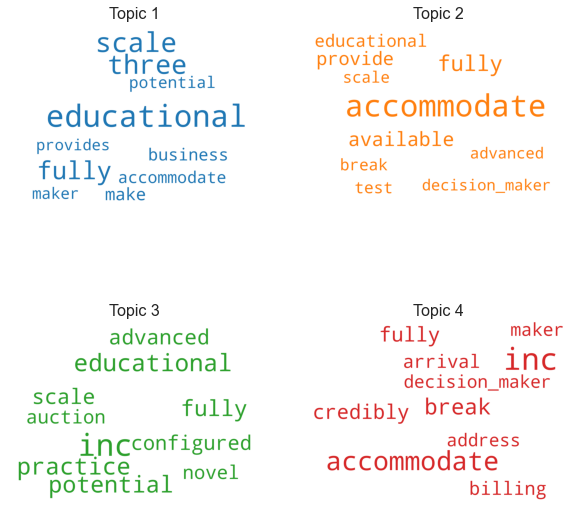

In [75]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = lda_model0.show_topics(formatted=False, num_topics=4)
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

In [76]:
inc = df.coverDate == 2
print(sum(inc))

1109


C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
